# Курсовая работа

## Выполнила студентка группы БФИ2202 Бокова Арина Константиновна

### Задание
Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |

Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Создаем класс узла списка
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
# Создаем класс хэш-таблицы
class HashTable:
    def __init__(self):
        self.capacity = 10
        self.size = 0
        self.buckets = [None] * self.capacity

    # Метод добавления элемента в таблицу
    def add(self, key, value):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key:
                node.value = value
                return
            node = node.next
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        if self.size > 0.7 * self.capacity:
            self.resize()

    # Метод получения значения по ключу
    def get(self, key):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key:
                return node.value
            node = node.next
        return None

    # Метод изменения емкости таблицы
    def resize(self):
        new_capacity = self.capacity * 2
        new_buckets = [None] * new_capacity
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

In [3]:
# Функция сортировки пузырьком
def bubble_sort(arr, key_index, descending=True):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if (arr[j][key_index] < arr[j+1][key_index] and descending) or (arr[j][key_index] > arr[j+1][key_index] and not descending):
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [29]:
def bubble_sort_1d(arr, descending=True):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if (arr[j] < arr[j+1] and descending) or (arr[j] > arr[j+1] and not descending):
                arr[j], arr[j+1] = arr[j+1], arr[j]
    
    return arr

In [32]:
def count(file):
    earnings_table = HashTable() # таблица доходов
    sales_table = HashTable() # таблица продаж

    revenue = 0
    count_max_sold_product = 0
    max_sold_product = ""
    max_revenue_product = ""
    revenue_array = []

    next(file)  # пропускаем первую строку с заголовками

    for line in file:
        revenue += int(line[6])

        if count_max_sold_product < int(line[4]):
            count_max_sold_product = int(line[4])
            max_sold_product = line[2]

        revenue_array.append(int(line[6]))
        sales_table.add(str(line[6]), line[2])
        earnings_table.add(str(line[2]), line[4])
        earnings_table.add(str(line[2]) + "1", line[6])

    sorted_revenue = bubble_sort_1d(revenue_array)

    max_revenue_product = sales_table.get(str(sorted_revenue[-1]))

    return revenue, max_sold_product, max_revenue_product


In [33]:
try:
    with open("table_kurs_2.csv", encoding='utf-8') as file:

        csv_file_reader = csv.reader(file, delimiter=",")
        revenue, max_sold_product, max_revenue_product = count(csv_file_reader)

        print(f'Общая выручка магазина: {revenue} рублей')
        print(f'Товар, который был продан наибольшее количество раз: {max_sold_product}')
        print(f'Товар, который принес наибольшую выручку: {max_revenue_product}')

except Exception as e:
    print(f'Ошибка: {e}')


Общая выручка магазина: 2004000 рублей
Товар, который был продан наибольшее количество раз: Книга "Война и мир"
Товар, который принес наибольшую выручку: Книга "Война и мир"


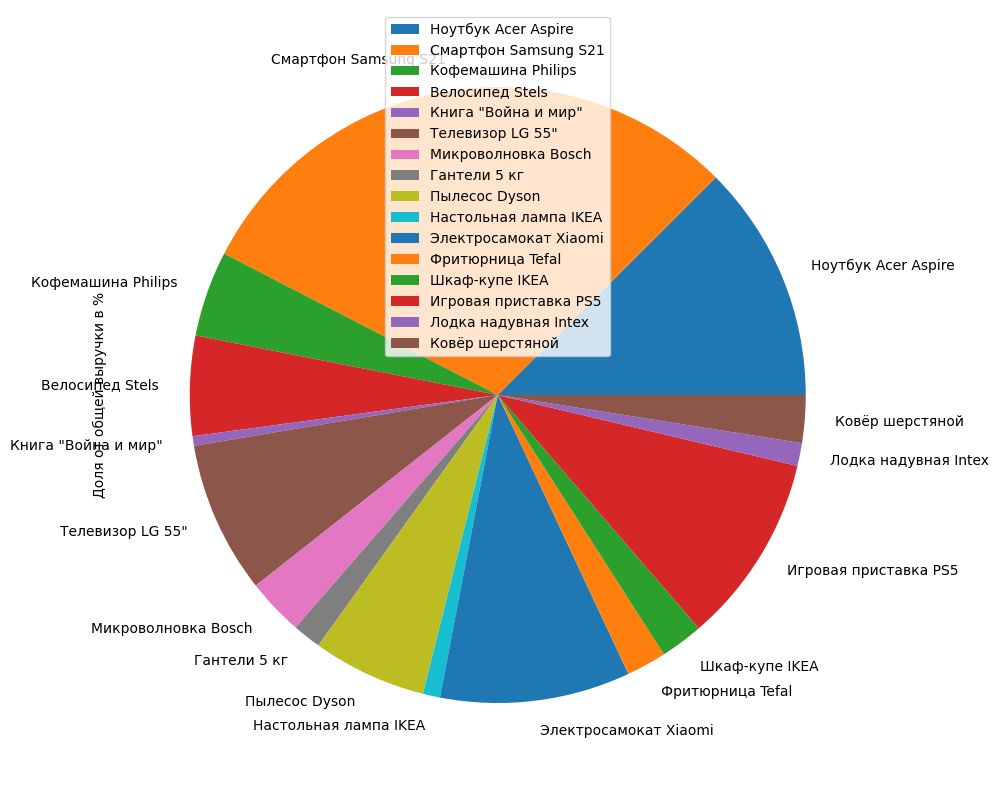

In [39]:
data = pd.read_csv('table_kurs_2.csv', sep=',')

# Пересчитываем столбец "Доля от общей выручки в %"
data['Доля от общей выручки в %'] = data['Общая стоимость'] / (revenue / 100)
data['Доля от общей выручки в %'] = data['Доля от общей выручки в %'].round(2)
data.index = data['Название товара']


data.plot(y = 'Доля от общей выручки в %', kind = 'pie', figsize=(10,10))
plt.show()